 1. Import Required Libraries

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


 2. Set Dataset Path & Image Parameters

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the zip file

import zipfile
import os

# Replace with your actual uploaded zip filename
with zipfile.ZipFile("Tree_Species_Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("tree_dataset")

dataset_path = "tree_dataset/Tree_Species_Dataset"


img_height, img_width = 128, 128
batch_size = 32

Saving Tree_Species_Dataset.zip to Tree_Species_Dataset.zip


3. Load Dataset using ImageDataGenerator

In [ ]:
import shutil

# Remove .git if it exists
shutil.rmtree(dataset_path + "/.git", ignore_errors=True)


In [ ]:

# STEP 3: Create train and validation sets using Keras preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

class_names = list(train_generator.class_indices.keys())
print("Class labels the model can now predict:", class_names)



Found 1280 images belonging to 30 classes.
Found 320 images belonging to 30 classes.
Class labels the model can now predict: ['amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


Define & Compile CNN Model

In [ ]:

# STEP 4: Build model with MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])
# STEP 5: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,425,822 (9.25 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# STEP 6: Add callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]


Train the Model

In [ ]:

epochs = 20

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=callbacks
)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 23s 340ms/step - accuracy: 0.1038 - loss: 3.5797 - val_accuracy: 0.2438 - val_loss: 2.8878 - learning_rate: 0.0010
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - accuracy: 0.2217 - loss: 2.7874 - val_accuracy: 0.3531 - val_loss: 2.4645 - learning_rate: 0.0010
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.3172 - loss: 2.4631 - val_accuracy: 0.4187 - val_loss: 2.1739 - learning_rate: 0.0010
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - accuracy: 0.3882 - loss: 2.1372 - val_accuracy: 0.4437 - val_loss: 2.0598 - learning_rate: 0.0010
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 234ms/step - accuracy: 0.4046 - loss: 2.0468 - val_accuracy: 0.4531 - val_loss: 1.9202 - learning_rate: 0.0010
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.4552 - loss: 1.8293 - val_accuracy: 0.5094 - val_loss: 1.8646 - learning_rate: 0.0010
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 235ms/step - accuracy: 0.4659 - loss: 1.8080 

Plot Training Performance

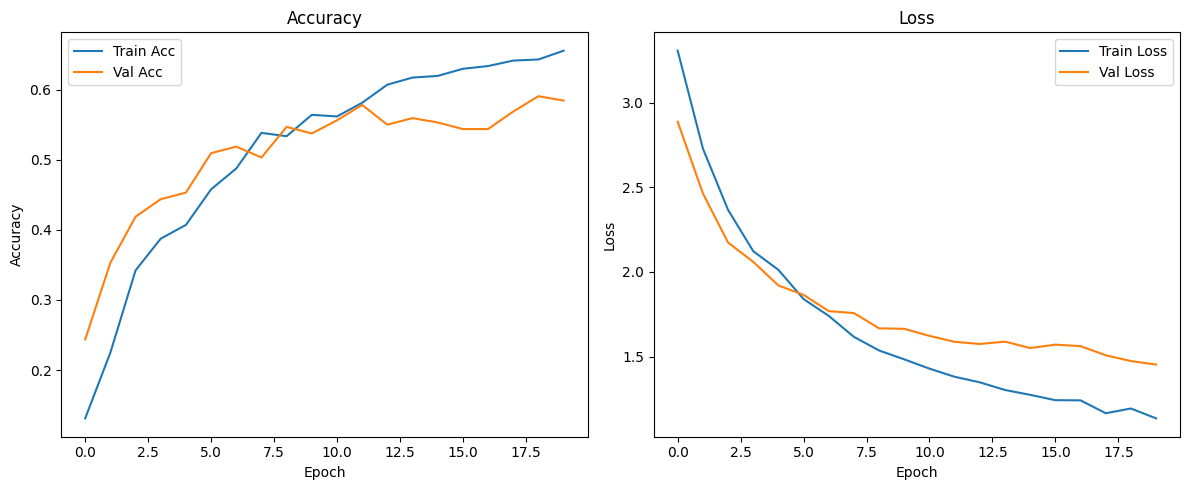

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step


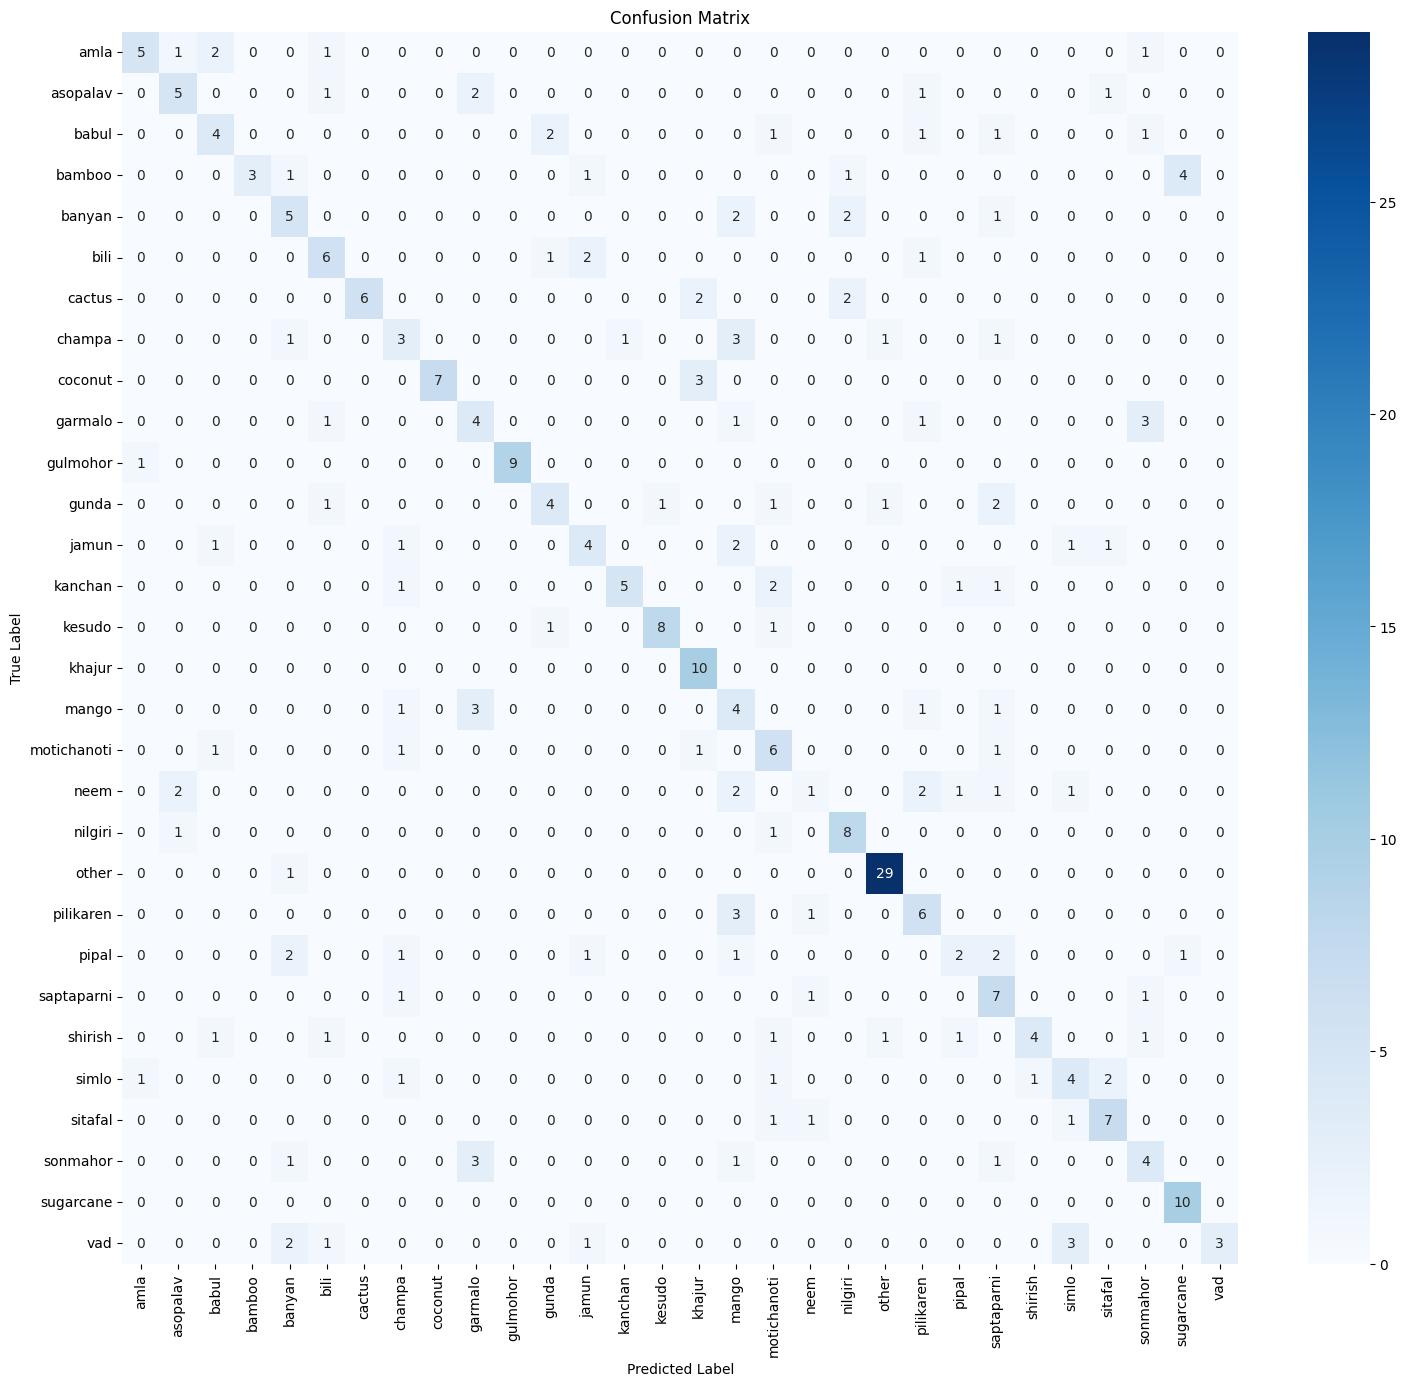

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict labels for validation data
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(18, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


Classification report

In [ ]:
# Print detailed classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

        amla       0.71      0.50      0.59        10
    asopalav       0.56      0.50      0.53        10
       babul       0.44      0.40      0.42        10
      bamboo       1.00      0.30      0.46        10
      banyan       0.38      0.50      0.43        10
        bili       0.50      0.60      0.55        10
      cactus       1.00      0.60      0.75        10
      champa       0.30      0.30      0.30        10
     coconut       1.00      0.70      0.82        10
     garmalo       0.33      0.40      0.36        10
    gulmohor       1.00      0.90      0.95        10
       gunda       0.50      0.40      0.44        10
       jamun       0.44      0.40      0.42        10
     kanchan       0.83      0.50      0.62        10
      kesudo       0.89      0.80      0.84        10
      khajur       0.62      1.00      0.77        10
       mango       0.21      0.40      0.28        10
 mo

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

def predict_image(img_path):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]
    print("✅ Predicted Class:", predicted_class)



In [ ]:
predict_image("/content/amla.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
✅ Predicted Class: amla


In [ ]:
predict_image("/content/sugca.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
✅ Predicted Class: sugarcane


In [ ]:
predict_image("/content/mango.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
✅ Predicted Class: mango


In [ ]:
predict_image("/content/coco.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
✅ Predicted Class: coconut


In [ ]:
predict_image("/content/cc.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
✅ Predicted Class: cactus


In [ ]:
predict_image("/content/cac.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
✅ Predicted Class: cactus
